## TASK-4 EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Checking number of rows and columns of the dataset.
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
dup=df.duplicated().sum()
print(f'Number of duplicated rows are {dup}')

Number of duplicated rows are 403


In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### Some basic characterstics of dataset

* The 'Spam' dataset consists of different messages and their categories.
* There are 5572 rows and 5 columns provided in the data.
* 403 duplicate rows are present in the dataset.
* No Null values exist in v1 & v2 column, but lots of null values present in unnamed 2,3,4 columns.

In [9]:
for i in df.columns.tolist():
    print("No. of unique values in" ,i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


In [10]:
df = df[['v1', 'v2']]
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
print("Dataset preview:")
print(df.head())

Dataset preview:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


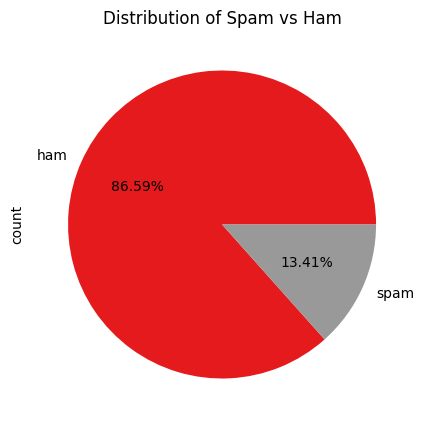

In [11]:
# Distribution of Spam vs Ham messages using pie chart
spread = df['label'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Setting labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()
     

### Insights

The pie chart reveals that 13.41% of the messages in the dataset are spam, while 86.59% are ham (non-spam) messages.

In [12]:
# Splitting spam messages
df_spam = df[df['label']=='spam'].copy()

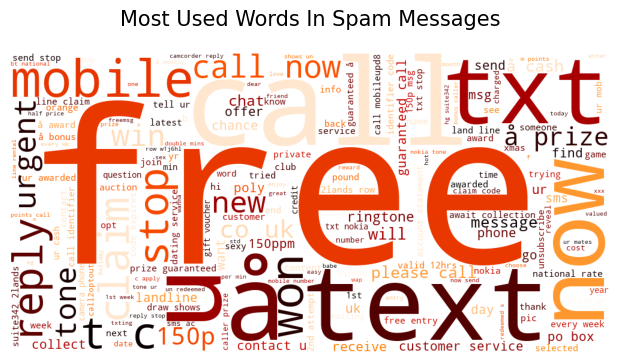

In [13]:
# WordCloud plot visualization for most used words in spam messages
# Create a string to store all the words
comment_words = ''

# Remove the stopwords
stopwords = set(STOPWORDS)

# Iterate through the column
for val in df_spam.message:

    # Typecaste each val to string
    val = str(val)

    # Split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display chart
plt.show()

In [14]:
# Preprocess the text
def clean_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Apply text cleaning
df['clean_message'] = df['message'].apply(clean_text)

# Map labels to binary values: ham -> 0, spam -> 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [15]:
# Define features and target variable
X = df['clean_message']
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
import nltk

In [17]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords.words('english'))),
    ('clf', MultinomialNB())
])

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...])),
                ('clf', MultinomialNB())])

In [18]:
# Make predictions and evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(report)

# Predictions on new sample emails
sample_emails = [
    "Congratulations! You've won a free lottery. Claim now!",
    "Hi John, could you please send me the report by today?"
]
predictions = pipeline.predict(sample_emails)
for email, pred in zip(sample_emails, predictions):
    label = "Spam" if pred == 1 else "Ham"
    print(f"Email: {email}\nPrediction: {label}\n")


Model Accuracy: 96.77%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Email: Congratulations! You've won a free lottery. Claim now!
Prediction: Spam

Email: Hi John, could you please send me the report by today?
Prediction: Ham



## Spam Detection Model Evaluation

This notebook summarizes and interprets the results of a binary text classification model where:

- Class 0 = Ham (not spam)
- Class 1 = Spam

---

### Overall Model Accuracy

- Accuracy: **96.77%**

This means the model correctly classified ~97% of the messages as either spam or ham.

---

### Classification Report

| Metric       | Ham (Class 0) | Spam (Class 1) |
|--------------|----------------|----------------|
| Precision    | 0.96           | 1.00           |
| Recall       | 1.00           | 0.76           |
| F1-Score     | 0.98           | 0.86           |
| Support      | 965            | 150            |

---

### Interpretation: Ham (Class 0)

- Precision = 0.96 → 96% of messages predicted as ham were truly ham.
- Recall = 1.00 → All actual ham messages were correctly identified.
- F1-Score = 0.98 → High balance between precision and recall.
- Support = There were 965 ham emails in the test set.

The model is highly effective at catching all ham messages without missing any.

---

### Interpretation: Spam (Class 1)

- Precision = 1.00 → The model predicted spam emails with perfect precision. Every email it marked as spam was spam(no false positives).
- Recall = 0.76 →Out of all actual spam emails, only 76% were correctly identified — meaning it missed 24% of spam emails (false negatives).
- F1-Score = 0.86 → Lower than ham due to missed spam.
- Support = 150 spam emails were present in the test set.

The model is very conservative — it avoids mislabeling ham as spam, but in doing so, misses some spam messages.

---

### Averaged Scores

| Type          | Precision | Recall | F1-Score |
|---------------|-----------|--------|----------|
| Macro Avg     | 0.98      | 0.88   | 0.92     |
| Weighted Avg  | 0.97      | 0.97   | 0.97     |

-  Macro Avg: Averages the scores equally for both classes (useful for imbalanced datasets).
-  Weighted Avg: Takes into account the number of samples per class — more reliable if the dataset is imbalanced (like here: 965 ham vs 150 spam).

---

### Example Predictions

- "Congratulations! You’ve won a free lottery..." →  Spam 
- "Hi John, could you send me the report by today?" →  Ham 

These predictions align well with expectations.

---

### Summary

- The model is excellent at identifying ham.
- Very cautious about flagging spam — no false alarms, but might let some spam slip through.
- But it could benefit from improving spam recall.